In [1]:
from tratamento_module import *
from modelos_module import *
import numpy as np
import pandas as pd
import warnings
import importlib
from IPython.lib.deepreload import reload
from sklearn.metrics import plot_confusion_matrix
%load_ext autoreload
%autoreload 2


In [2]:
warnings.filterwarnings("ignore")

In [3]:
tratamento = Tratamento()
amostras = tratamento.amostras_import()
amostras = tratamento.get_frequencies_from(amostras,900)

In [4]:
tratamento.get_samples(amostras)
X_train,X_test,y_train,y_test = tratamento.training_test()

TypeError: training_test() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
pca = tratamento.PCA_t(X_train, n_components=4)

In [ ]:
pca.explained_variance_ratio_

array([0.92615117, 0.05094594, 0.02073002, 0.00134116])

In [8]:
X_test_transformed = pca.transform(X_test.to_numpy())

In [9]:
modelos = Modelos(X_train = X_train,y_train = y_train)

In [10]:
modelos_pca = Modelos(X_train=pca.transform(X_train),y_train=y_train)

In [11]:
svm_grid = modelos_pca.SVM_GRID()

In [12]:
svm_grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [13]:
svm_grid.best_score_

0.8549019607843137

In [14]:
nn = modelos.NN()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 255 samples
Epoch 1/300
255/255 [==============================] - 0s 592us/sample - loss: 0.6955 - acc: 0.4588
Epoch 2/300
255/255 [==============================] - 0s 114us/sample - loss: 0.6911 - acc: 0.5922
Epoch 3/300
255/255 [==============================] - 0s 118us/sample - loss: 0.6895 - acc: 0.6510
Epoch 4/300
255/255 [==============================] - 0s 114us/sample - loss: 0.6859 - acc: 0.7216
Epoch 5/300
255/255 [==============================] - 0s 114us/sample - loss: 0.6843 - acc: 0.7490
Epoch 6/300
255/255 [==============================] - 0s 129us/sample - loss: 0.6809 - acc: 0.7843
Epoch 7/300
255/255 [==============================] - 0s 114us/sample - loss: 0.6784 - acc: 0.8118
Epoch 8/300
255/255 [==============================] - 0s 114us/sample - loss: 0.6785 - acc: 0.8157
Epoc

In [15]:
y_predict = nn.predict(X_test.to_numpy())
y_predict_1 =  np.where(y_predict  > 0.5, 1, 0)

In [16]:
nn_pca = modelos_pca.NN()

Train on 255 samples
Epoch 1/300
255/255 [==============================] - 0s 443us/sample - loss: 0.6864 - acc: 0.5569
Epoch 2/300
255/255 [==============================] - 0s 126us/sample - loss: 0.6810 - acc: 0.6510
Epoch 3/300
255/255 [==============================] - 0s 129us/sample - loss: 0.6842 - acc: 0.6314
Epoch 4/300
255/255 [==============================] - 0s 129us/sample - loss: 0.6828 - acc: 0.6078
Epoch 5/300
255/255 [==============================] - 0s 137us/sample - loss: 0.6860 - acc: 0.6471
Epoch 6/300
255/255 [==============================] - 0s 141us/sample - loss: 0.6771 - acc: 0.6588
Epoch 7/300
255/255 [==============================] - 0s 153us/sample - loss: 0.6803 - acc: 0.6706
Epoch 8/300
255/255 [==============================] - 0s 169us/sample - loss: 0.6695 - acc: 0.6706
Epoch 9/300
255/255 [==============================] - 0s 149us/sample - loss: 0.6686 - acc: 0.7333
Epoch 10/300
255/255 [==============================] - 0s 153us/sample - loss:

In [17]:
y_predict = nn_pca.predict(pca.transform(X_test))

In [18]:
X_train_under, y_train_under = tratamento.under_sample()

In [19]:
modelos_under = Modelos(X_train = X_train_under,y_train = y_train_under)

In [20]:
svm_grid_under = modelos_under.SVM_GRID()

In [21]:
svm_grid_under.score(X=tratamento.X_test,y = tratamento.y_test)

0.4818181818181818

In [22]:
nn_under = modelos_under.NN()

Train on 74 samples
Epoch 1/300
74/74 [==============================] - 0s 1ms/sample - loss: 0.6920 - acc: 0.5676
Epoch 2/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6922 - acc: 0.4459
Epoch 3/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6885 - acc: 0.5000
Epoch 4/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6938 - acc: 0.4459
Epoch 5/300
74/74 [==============================] - 0s 162us/sample - loss: 0.6950 - acc: 0.4865
Epoch 6/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6927 - acc: 0.4865
Epoch 7/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6921 - acc: 0.5541
Epoch 8/300
74/74 [==============================] - 0s 189us/sample - loss: 0.6924 - acc: 0.5135
Epoch 9/300
74/74 [==============================] - 0s 176us/sample - loss: 0.6909 - acc: 0.5811
Epoch 10/300
74/74 [==============================] - 0s 162us/sample - loss: 0.6942 - acc: 0.4324
E

In [23]:
y_pred_under = nn_under.predict(tratamento.X_test)
y_pred_under_aft =  np.where(y_pred_under  > 0.5, 1, 0)

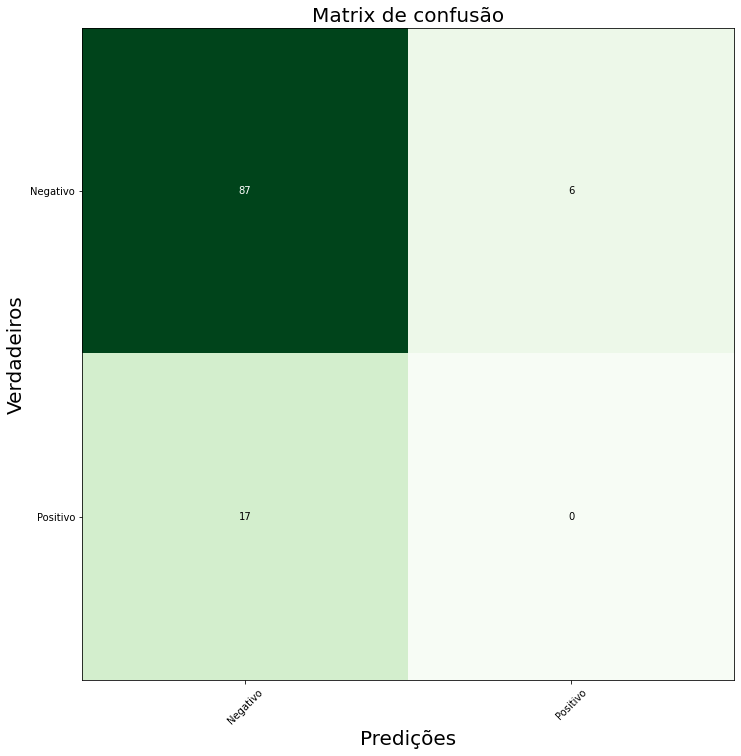

In [24]:
tratamento.confusion(y_true=tratamento.y_test.astype(int),y_predict=y_pred_under_aft)

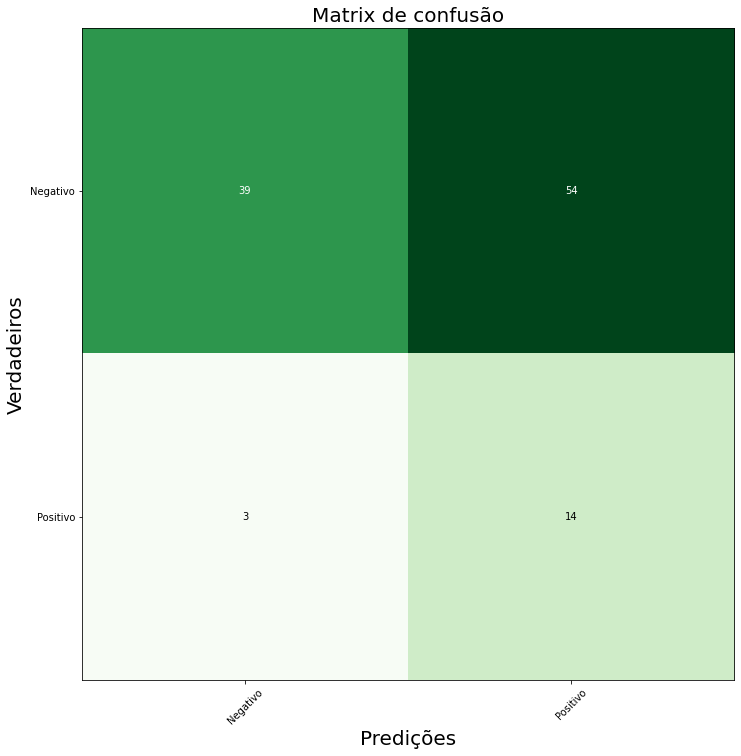

In [25]:
tratamento.confusion(y_true=tratamento.y_test,y_predict=svm_grid_under.predict(tratamento.X_test))

In [26]:
X_train_over,y_train_over = tratamento.over_sample()

In [27]:
modelos_over= Modelos(X_train = X_train_over,y_train = y_train_over)

In [28]:
modelos_over.SVM_GRID()

GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 0.3, 0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=False)

In [29]:
svm_grid_under.score(X=tratamento.X_test,y = tratamento.y_test)

0.4818181818181818

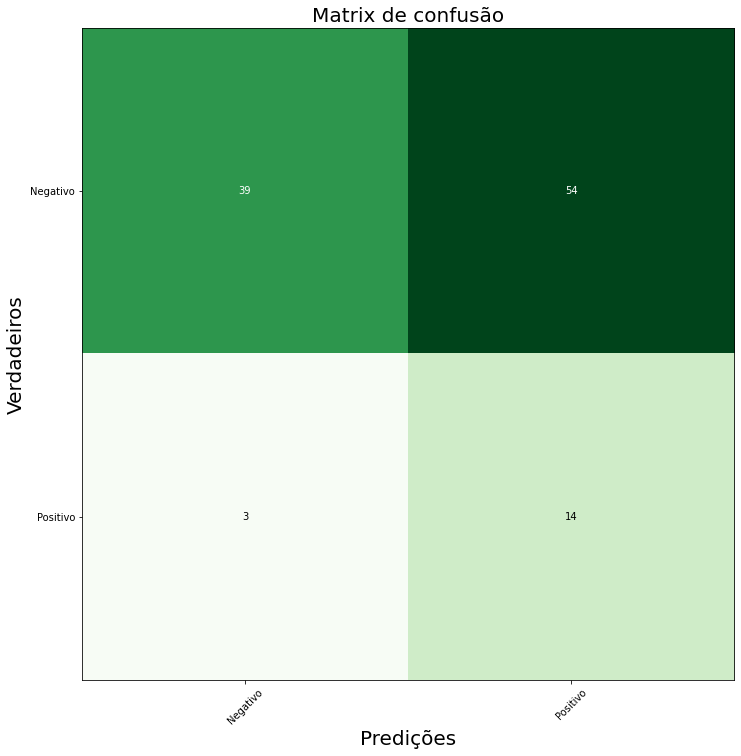

In [30]:
tratamento.confusion(y_true=tratamento.y_test,y_predict=svm_grid_under.predict(tratamento.X_test))

In [31]:
nn_over = modelos_over.NN()
#modelos_over.X_train.shape

Train on 436 samples
Epoch 1/300
436/436 [==============================] - 0s 330us/sample - loss: 0.6922 - acc: 0.5115
Epoch 2/300
436/436 [==============================] - 0s 138us/sample - loss: 0.6936 - acc: 0.4954
Epoch 3/300
436/436 [==============================] - 0s 117us/sample - loss: 0.6936 - acc: 0.5000
Epoch 4/300
436/436 [==============================] - 0s 112us/sample - loss: 0.6919 - acc: 0.5138
Epoch 5/300
436/436 [==============================] - 0s 117us/sample - loss: 0.6914 - acc: 0.5528
Epoch 6/300
436/436 [==============================] - 0s 112us/sample - loss: 0.6928 - acc: 0.4817
Epoch 7/300
436/436 [==============================] - 0s 115us/sample - loss: 0.6933 - acc: 0.4839
Epoch 8/300
436/436 [==============================] - 0s 115us/sample - loss: 0.6934 - acc: 0.4954
Epoch 9/300
436/436 [==============================] - 0s 112us/sample - loss: 0.6915 - acc: 0.5206
Epoch 10/300
436/436 [==============================] - 0s 131us/sample - loss:

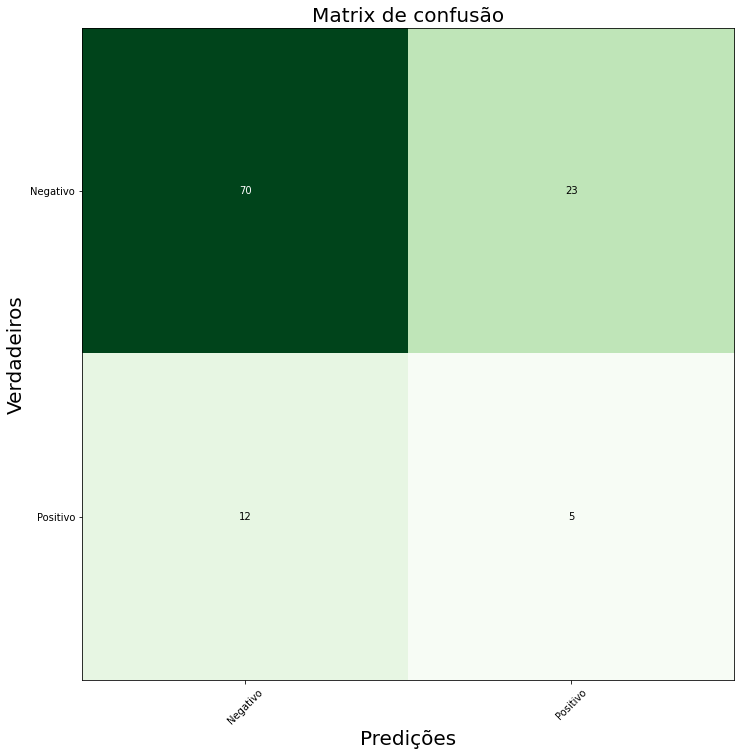

In [32]:
y_pred_over = nn_over.predict(tratamento.X_test)
y_pred_over_aft =  np.where(y_pred_over  > 0.5, 1, 0)
tratamento.confusion(y_true=tratamento.y_test.astype(int),y_predict=y_pred_over_aft)

In [33]:
y_pred_under = nn_under.predict(tratamento.X_test)
y_pred_under_aft =  np.where(y_pred_under  > 0.5, 1, 0)

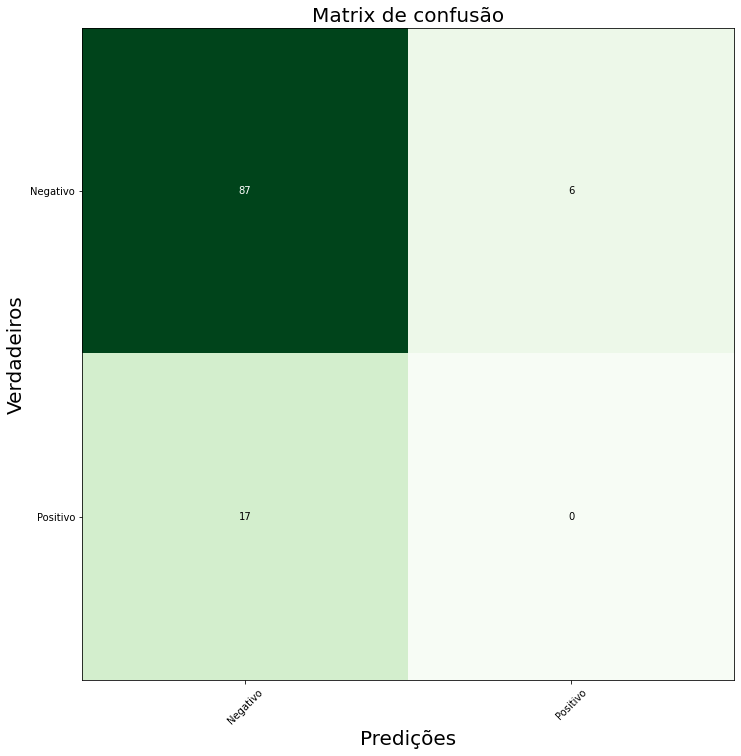

In [34]:
tratamento.confusion(y_true=tratamento.y_test.astype(int),y_predict=y_pred_under_aft)

In [35]:
pca_under = tratamento.PCA_t(X_train=X_train_under)

In [36]:
modelo_pca_under = Modelos(X_train=pca_under.transform(X_train_under),y_train=y_train_under)

In [37]:
svm_pca_under = modelo_pca_under.SVM_GRID()

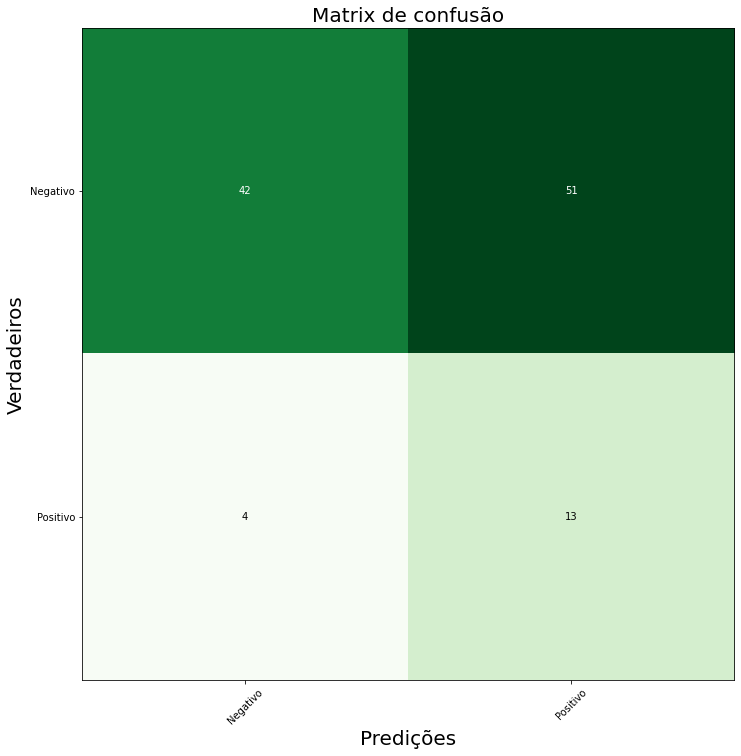

In [38]:
tratamento.confusion(y_true=tratamento.y_test,y_predict=svm_pca_under.predict(pca_under.transform(tratamento.X_test)))

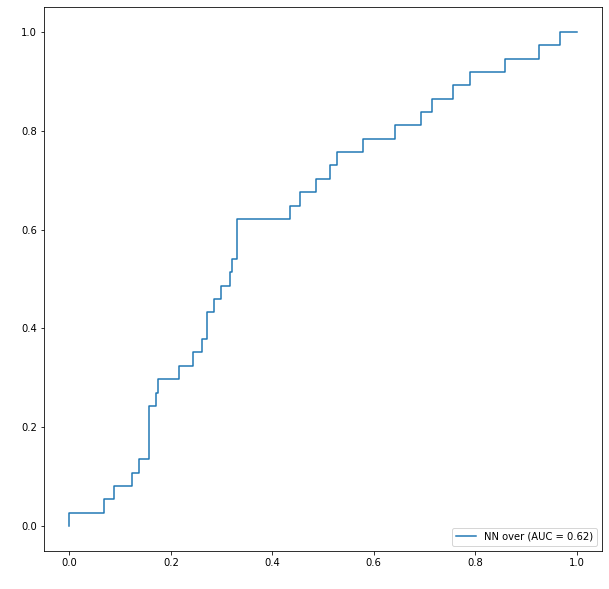

In [40]:
display = tratamento.roc(tratamento.y_train.to_numpy().astype(int),nn_over.predict(tratamento.X_train),estimator_name='NN over')